<a href="https://colab.research.google.com/github/ashutosh-gupta2111/Exploratory_project/blob/master/Exploratory_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the code of Exploratory Project of Ashutosh Gupta.**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [8]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt

Numpy is the library for helping in linear algebra.
Pandas is used for data visualization.
os is used mainly in giving file support.
cv2 is main python library that is used in this model for prediction. 


In [9]:
labels = os.listdir('/content/grive/MyDrive/train')

In [10]:
print(labels)

['no_yawn', 'Open', 'yawn', 'Closed']


Now Visualizing Yawn images.

In [11]:
a = plt.imread("/content/grive/MyDrive/train/yawn/10.jpg")

In [12]:
a.shape

(480, 640, 3)

Now a example of a Yawn image.

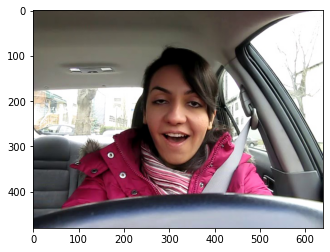

In [15]:
plt.imshow(plt.imread("/content/grive/MyDrive/train/yawn/9.jpg"))

Now we will pre-process the data.As background is unneccesary we will only consider face.